#  Housing sales data 


Predict housing sales in King's County, USA

This [Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction) contains Housing sales data in King's County, USA for one year i.e. May 2014 to May 2015. 

>## Feature Columns
>* **id** - Unique ID for each home sold
>* **date** - Date of the home sale
>* **price** - Price of each home sold
>* **bedrooms** - Number of bedrooms
>* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
>* **sqft_living** - Square footage of the apartments interior living space
>* **sqft_lot** - Square footage of the land space
>* **floors** - Number of floors
>* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
>* **view** - An index from 0 to 4 of how good the view of the property was
>* **condition** - An index from 1 to 5 on the condition of the apartment,
>* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average >level of construction and design, and 11-13 have a high quality level of construction and design.
>* **sqft_above** - The square footage of the interior housing space that is above ground level
>* **sqft_basement** - The square footage of the interior housing space that is below ground level
>* **yr_built** - The year the house was initially built
>* **yr_renovated** - The year of the house’s last renovation
>* **zipcode** - What zipcode area the house is in
>* **lat** - Lattitude
>* **long** - Longitude
>* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
>* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_params={'legend.fontsize':18,
          'axes.labelsize': 18,
          'axes.titlesize':20,
          'xtick.labelsize':16,
          'ytick.labelsize':16,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

In [2]:
# Load the data
df=pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


There are no missing values in the dataset. All the relevant values except 'date' have numerical datatype. 

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
df['date'].dtype

dtype('<M8[ns]')

## 1. Exploratory data analysis

### Correlation of 'price' with other attributes

In [9]:
df.corr()['price'].sort_values(ascending=True)

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

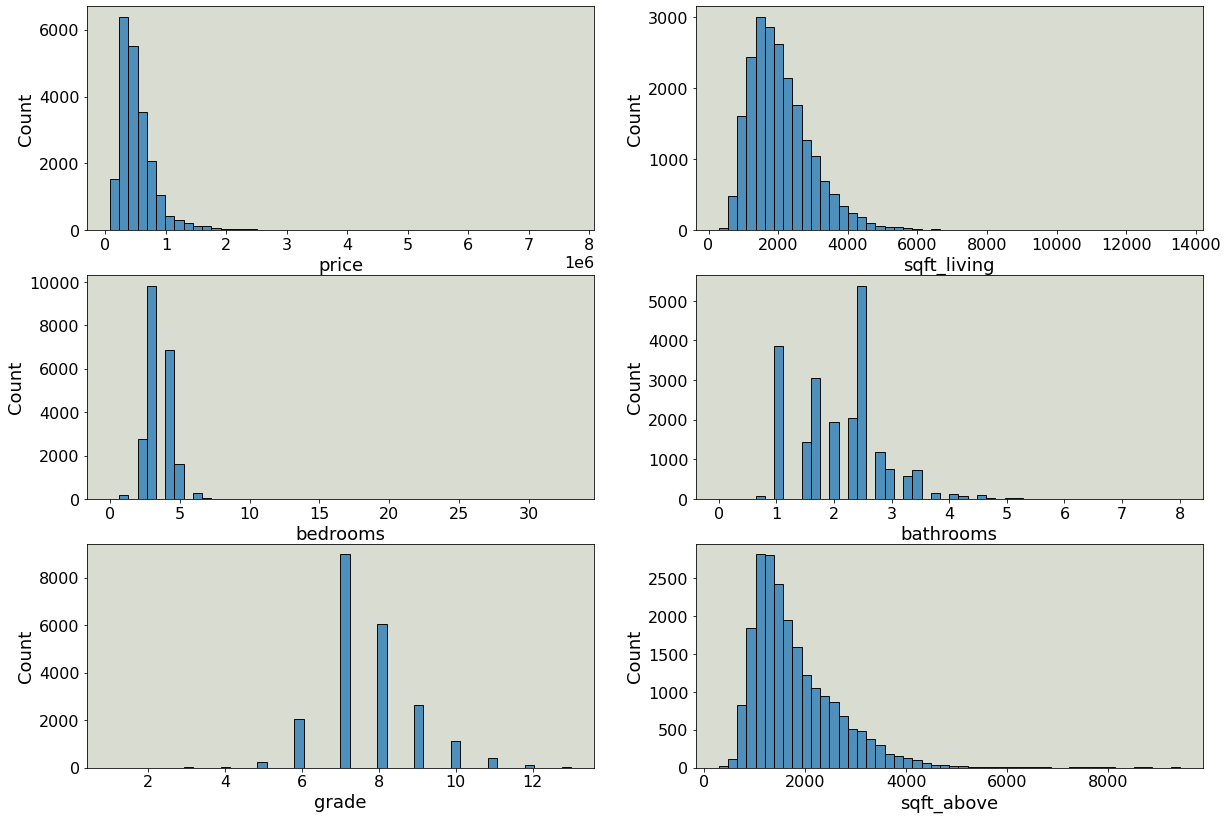

In [10]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,14))
sns.histplot(ax=ax[0,0],data=df,x='price',bins=50)
sns.histplot(ax=ax[0,1],data=df,x='sqft_living',bins=50)
sns.histplot(ax=ax[1,0],data=df,x='bedrooms',bins=50)
sns.histplot(ax=ax[1,1],data=df,x='bathrooms',bins=50)
sns.histplot(ax=ax[2,0],data=df,x='grade',bins=50)
sns.histplot(ax=ax[2,1],data=df,x='sqft_above',bins=50)
plt.show()

In [11]:
print('percentage of Houses with price above 2.3 Mn wrt all houses : \n')
print(sum(df['price']>2.3e6)/sum(df['price']>0)*100,'%')
print('\n')
print('percentage of Houses with grade 12 wrt all houses : \n')
print(sum(df['grade']>11)/sum(df['grade']<13)*100,'%')
print('\n')
print('percentage of Houses with bathrooms >5 wrt all houses : \n')
print(sum(df['bathrooms']>5)/sum(df['bathrooms']>0)*100,'%')
print('\n')
print('percentage of Houses with living area >5500 wrt all houses : \n')
print(sum(df['sqft_living']>5500)/sum(df['sqft_living']>0)*100,'%')

percentage of Houses with price above 2.3 Mn wrt all houses : 

0.6246240688474529 %


percentage of Houses with grade 12 wrt all houses : 

0.4768518518518518 %


percentage of Houses with bathrooms >5 wrt all houses : 

0.19904642873674952 %


percentage of Houses with living area >5500 wrt all houses : 

0.5552213945310693 %


Therefore, we can exclude houses above $3 Mn selling price from the analysis. 

In [12]:
df_blw_3mn=df[df['price']<=2.3e6]

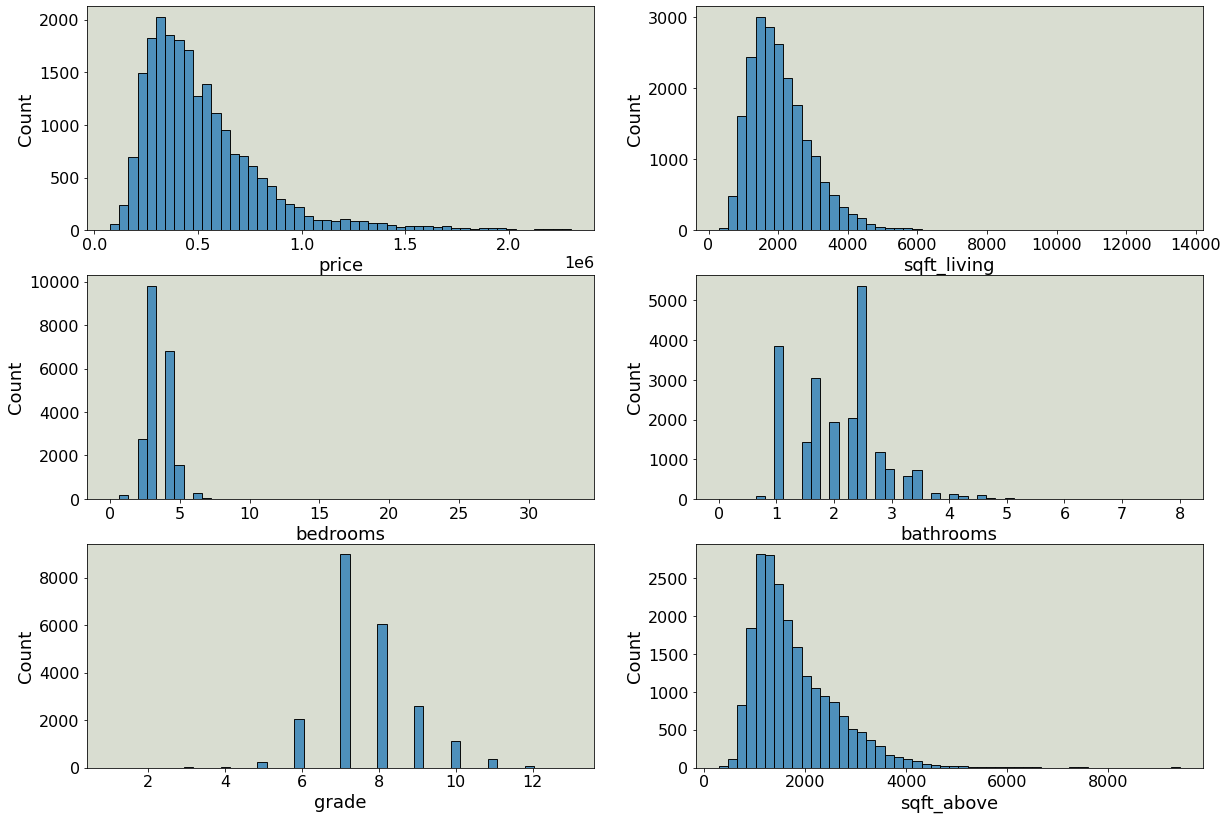

In [13]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,14))
sns.histplot(ax=ax[0,0],data=df_blw_3mn,x='price',bins=50)
sns.histplot(ax=ax[0,1],data=df_blw_3mn,x='sqft_living',bins=50)
sns.histplot(ax=ax[1,0],data=df_blw_3mn,x='bedrooms',bins=50)
sns.histplot(ax=ax[1,1],data=df_blw_3mn,x='bathrooms',bins=50)
sns.histplot(ax=ax[2,0],data=df_blw_3mn,x='grade',bins=50)
sns.histplot(ax=ax[2,1],data=df_blw_3mn,x='sqft_above',bins=50)
plt.show()

In [14]:
print('percentage of Houses with price above 2.3 Mn wrt all houses : \n')
print(sum(df_blw_3mn['price']>2.3e6)/sum(df_blw_3mn['price']>0)*100,'%')
print('\n')
print('percentage of Houses with grade 12 wrt all houses : \n')
print(sum(df_blw_3mn['grade']>11)/sum(df_blw_3mn['grade']<13)*100,'%')
print('\n')
print('percentage of Houses with bathrooms >5 wrt all houses : \n')
print(sum(df_blw_3mn['bathrooms']>5)/sum(df_blw_3mn['bathrooms']>0)*100,'%')
print('\n')
print('percentage of Houses with living area >5500 wrt all houses : \n')
print(sum(df_blw_3mn['sqft_living']>5500)/sum(df_blw_3mn['sqft_living']>0)*100,'%')

percentage of Houses with price above 2.3 Mn wrt all houses : 

0.0 %


percentage of Houses with grade 12 wrt all houses : 

0.30264934581179864 %


percentage of Houses with bathrooms >5 wrt all houses : 

0.12111049003167505 %


percentage of Houses with living area >5500 wrt all houses : 

0.34919452462985384 %


Therefore, in this analysis, we will consider only the houses with selling price below $2.3 Mn. The resulting model will be valid for houses below $2.3 Mn.

### Lat-Long location and price

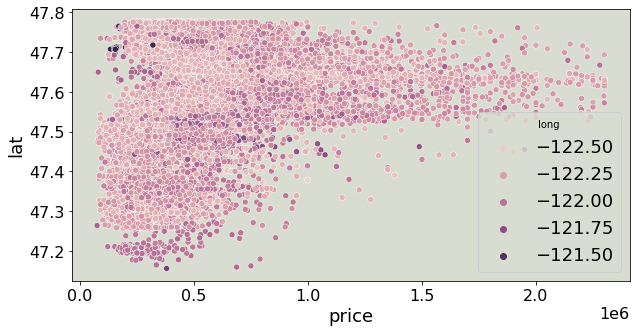

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='lat',data=df_blw_3mn,hue='long')
plt.show()

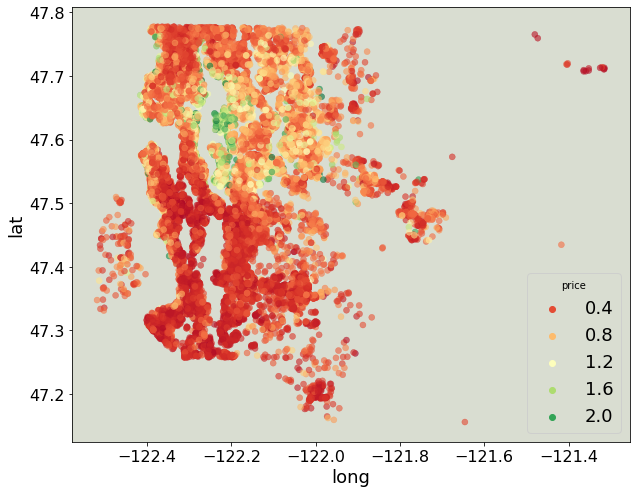

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df_blw_3mn,palette='RdYlGn',alpha=0.6,edgecolor=None)
plt.show()

It looks like properties in Seattle area are more expensive than that of inland one. It also looks like having a waterfront has a strong correlation with housing prices

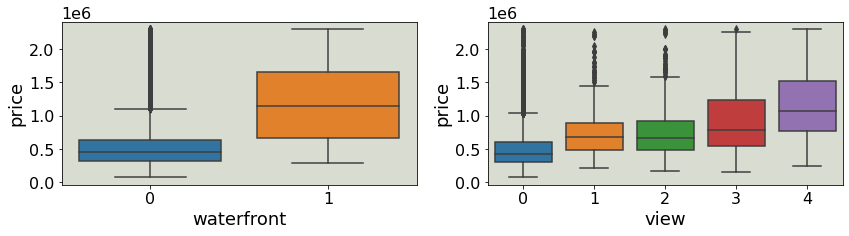

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
sns.boxplot(ax=ax[0],x='waterfront',y='price',data=df_blw_3mn)
sns.boxplot(ax=ax[1],x='view',y='price',data=df_blw_3mn)
plt.show()

## Feature engineering

Let's examine price trend with month of the year.

In [18]:
df_blw_3mn['year']=df_blw_3mn['date'].apply(lambda date:date.year)
df_blw_3mn['month']=df_blw_3mn['date'].apply(lambda date:date.month)

<ipython-input-18-93ddb2575a6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blw_3mn['year']=df_blw_3mn['date'].apply(lambda date:date.year)
<ipython-input-18-93ddb2575a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blw_3mn['month']=df_blw_3mn['date'].apply(lambda date:date.month)


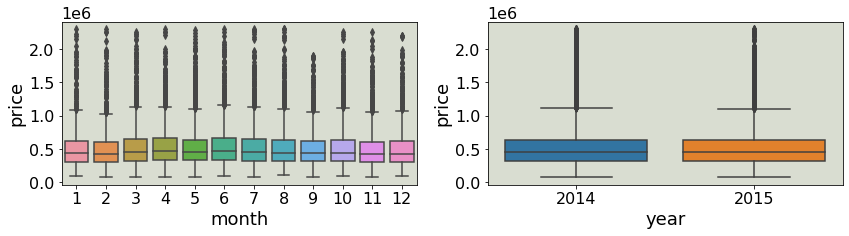

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
sns.boxplot(ax=ax[0],x='month',y='price',data=df_blw_3mn)
sns.boxplot(ax=ax[1],x='year',y='price',data=df_blw_3mn)
plt.show()

Text(0, 0.5, 'price')

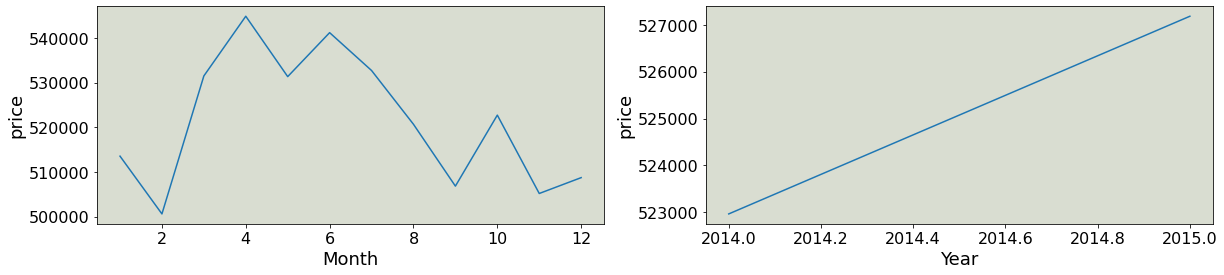

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,4))
ax[0].plot(df_blw_3mn.groupby('month')['price'].mean())
ax[0].set_xlabel('Month');ax[0].set_ylabel('price')
ax[1].plot(df_blw_3mn.groupby('year')['price'].mean())
ax[1].set_xlabel('Year');ax[1].set_ylabel('price')

There is a clear trend for mean prices and months. 
Meanwhile we can now drop date column from our analysis.

In [21]:
df_blw_3mn.drop('date',axis=1,inplace=True)
df_blw_3mn.drop('id',axis=1,inplace=True)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df_blw_3mn

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [23]:
df_blw_3mn['view'].value_counts()

0    19445
2      941
3      495
1      324
4      273
Name: view, dtype: int64

In [24]:
df_blw_3mn['yr_renovated'].value_counts()

0       20586
2014       91
2013       36
2000       35
2007       34
        ...  
1954        1
1944        1
1951        1
1959        1
1948        1
Name: yr_renovated, Length: 70, dtype: int64

There are 20k houses which are never renovated. Also,  

In [25]:
df_blw_3mn['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    102
98010    100
98024     81
98148     57
98039     34
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes. At this stage, we will just drop this column entirely instead of converting it to dummy 69 variables.

In [26]:
df_blw_3mn.drop('zipcode',axis=1,inplace=True)

/home/chaitanya/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_blw_3mn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Let's save this dataframe for further use.

In [28]:
df_blw_3mn.to_csv('./data/cleanData.csv',index=False)